# EXPLORATORY DATA ANALYSIS

As the name suggests we are exploring the given data, now we cannot extract information and judge the data just by looking at it. We need some statistical tools and concepts to analyze and make further decisons.

In [2]:
#Author : Harshit Behl
#Group : G1

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter

In [4]:
# importing dataset
animedata = pd.read_csv("../Datasets/animedataset.csv")

In [5]:
#check basic info
animedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      12294 non-null  object 
 1   genre     12232 non-null  object 
 2   type      12269 non-null  object 
 3   episodes  12294 non-null  object 
 4   rating    12064 non-null  float64
 5   members   12294 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 576.4+ KB


Given the data info, we need to do some first data-type checking (self lingo), we can see
that the continuous features of the dataset are in either integer or float data. So no 
issues here. But the categorical features that we can identify ('genre', 'type') are in object type. We need to specify them as a categorical data type in the data, since categorical datatype will take less memory than object datatype. 

Let's check the 'episodes' column. The column here is object. We need to convert this to integers to integers else  we will not be able to perform our statistical analysis on that.

In [6]:
animedata['genre'] = pd.Categorical(animedata.genre)
animedata['type'] = pd.Categorical(animedata.type)

In [7]:
#many values are 'Unknown' we cannot convert them to int we need to handle them.
animedata[animedata['episodes']=="Unknown"]

#we can see there are some shows with high ratings and members we cannot just drop them
#from the dataset, as there are 340 entries marked 'Unknown'

,name,genre,type,episodes,rating,members
74,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862
252,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,Unknown,8.25,114702
615,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578
991,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,Unknown,7.73,26267
1021,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,Unknown,7.72,5400
...,...,...,...,...,...,...
12265,Kyonyuu Reijou MC Gakuen,Hentai,OVA,Unknown,NaN,205
12274,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
12280,Saimin Class,Hentai,OVA,Unknown,NaN,240
12282,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,195


By some discussion with experts, I have realized that the shows which are marked 'Unknown' are shows either too old, running, having episode count near to 1000, or suitable for particular audience

In [8]:
#animes that have episode = 'Unknown' and rating as Nan
animedata[(animedata['episodes']=='Unknown') & (animedata['rating'].isnull())].head(5)

,name,genre,type,episodes,rating,members
9657,Nananin no Ayakashi: Chimi Chimi Mouryou!! Gen...,"Comedy, Supernatural",TV,Unknown,NaN,129
10896,Gintama (2017),"Action, Comedy, Historical, Parody, Samurai, S...",TV,Unknown,NaN,13383
10897,One Punch Man 2,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,Unknown,NaN,90706
10898,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,NaN,60999
10899,Shingeki no Kyojin Season 2,"Action, Drama, Fantasy, Shounen, Super Power",TV,Unknown,NaN,170054


In [9]:
#these shows were not released in 2017 so they are not rated and no episode count. We can drop them.
animedata.drop(animedata[(animedata['episodes']=='Unknown') & (animedata['rating'].isnull())].index, inplace=True)

In [10]:
#dropping genre with null values
animedata.drop(animedata[animedata['genre'].isnull()].index, inplace=True)

[Text(0.5, 1.0, 'No. of animes with given range of members')]

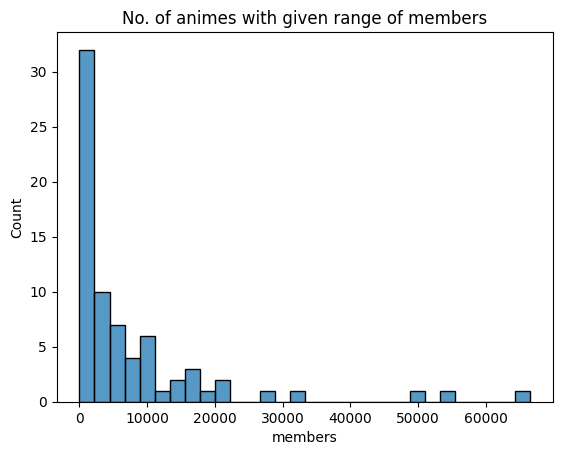

In [11]:
memrate = animedata[animedata['rating'].isnull()]['members']
animedata.drop(animedata[animedata['rating'].isnull()].index, inplace=True)
sns.histplot(memrate, bins=30).set(title="No. of animes with given range of members")

Analysis: Majority of anime with null rating has members within range of 0-10000, these are very less fans. Only 3 animes lie above the 40,000 member threshold

In [12]:
animedata.drop(animedata[(animedata['episodes']=="Unknown") & (animedata['members']<26267)].index, inplace=True)

In [13]:
animedata.loc[(animedata['episodes']=="Unknown"),'episodes'] = [500,700,500,200,100]

In [14]:
animedata['episodes'] = pd.to_numeric(animedata.episodes)

In [15]:
animedata.info() # all values analysed and handled

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11835 entries, 0 to 12293
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      11835 non-null  object  
 1   genre     11835 non-null  category
 2   type      11835 non-null  category
 3   episodes  11835 non-null  int64   
 4   rating    11835 non-null  float64 
 5   members   11835 non-null  int64   
dtypes: category(2), float64(1), int64(2), object(1)
memory usage: 651.7+ KB


## Measures of Central Tendency

Measuring the central tendency is one of the early steps in EDA. So what do we mean by measuring the central tendency? When the data is too big we need one value to represent the whole data. This value lies in the middle of the data, hence we can know the central value.

Mean: It is that Central measure of tendency which gives us one value to represent all. It is not robust to outliers

In [16]:
print(f"mean of episodes: {animedata['episodes'].mean()}")
print(f"mean of fans: {animedata['members'].mean()}")
print(f"mean of ratings: {animedata['rating'].mean()}")

mean of episodes: 12.650443599493029
mean of fans: 18612.25306294888
mean of ratings: 6.485240388677652


Median: We can call this as our 'positional' central measure of tendency as it gives middle most value of the data. that's why data needs to be ordered before calculating median.

In [17]:
print(f"median of episodes: {animedata['episodes'].median()}")
print(f"median of fans: {animedata['members'].median()}")
print(f"median of ratings: {animedata['rating'].median()}")

median of episodes: 2.0
median of fans: 1591.0
median of ratings: 6.57


Mode: This can be known as 'categorical' measure of central tendency, as gives the value with most frequency

In [18]:
animedata['type'].value_counts()

TV         3573
OVA        3246
Movie      2258
Special    1665
ONA         606
Music       487
Name: type, dtype: int64

<AxesSubplot: >

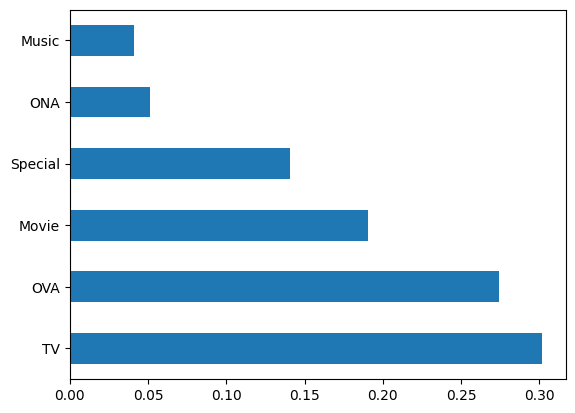

In [19]:
animedata['type'].value_counts(True).plot.barh()

Analysis: TV show is the most common type between anime shows.

## Measures of Dispersion

So far we calculated the measures of central tendency. Measures of central tendency provide an overview of data but it doesnt explain how the data is spread. How the value variates from the mean and how far the values really are. That's why we need Measures of Dispersion to further explore our data

In [20]:
print(f"standard deviation of episodes: {animedata['episodes'].std()}")
print(f"standard deviation of fans: {animedata['members'].std()}")
print(f"standard deviation of ratings: {animedata['rating'].std()}")

standard deviation of episodes: 47.96773294818999
standard deviation of fans: 55754.93904181452
standard deviation of ratings: 1.0194300464785173


In [21]:
print(f"Kurtosis of episodes: {animedata['episodes'].kurtosis()}")
print(f"Kurtosis of fans: {animedata['members'].kurtosis()}")
print(f"Kurtosis of ratings: {animedata['rating'].kurtosis()}")

Kurtosis of episodes: 679.5349809686232
Kurtosis of fans: 60.67936194094869
Kurtosis of ratings: 0.5046633696037572


In [22]:
print(f"Skewness of episodes: {animedata['episodes'].skew()}")
print(f"Skewness of fans: {animedata['members'].skew()}")
print(f"Skewness of ratings: {animedata['rating'].skew()}")

Skewness of episodes: 22.444899312028614
Skewness of fans: 6.568783461273703
Skewness of ratings: -0.5376927732064168


let's focus on ratings first

[Text(0.5, 1.0, 'Distribution of Ratings')]

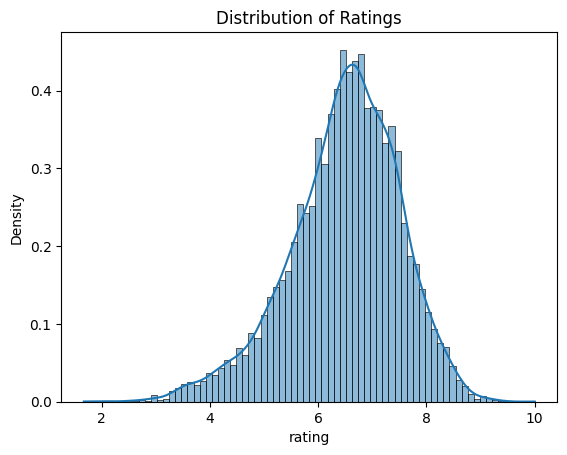

In [23]:
#here we received a high values for cases of episodes and fans, 
#the data is showing high variation
sns.histplot(animedata['rating'], kde=True, stat='density').set(title="Distribution of Ratings")

Very similar to normal distribution, beauty!

Now with episodes and members we need to transform them a little bit to understand the outliers better
Definition from Internet : Log transform, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. It is used to make data more normal, or symmetric.

<AxesSubplot: xlabel='type', ylabel='episodes'>

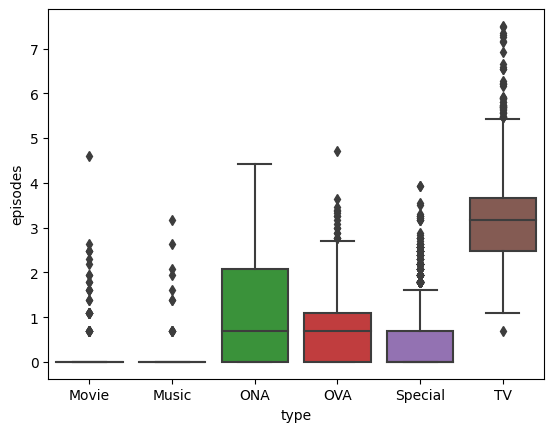

In [24]:
sns.boxplot(y = np.log(animedata['episodes']), x = 'type', data = animedata)

Analysis: In case of movies, most points are outliers, since a movie involves only 1 episode, there must be values with more than 1 episodes. It is to us whether we consider them outlier or not. Here I am keeping them.

<AxesSubplot: xlabel='type', ylabel='members'>

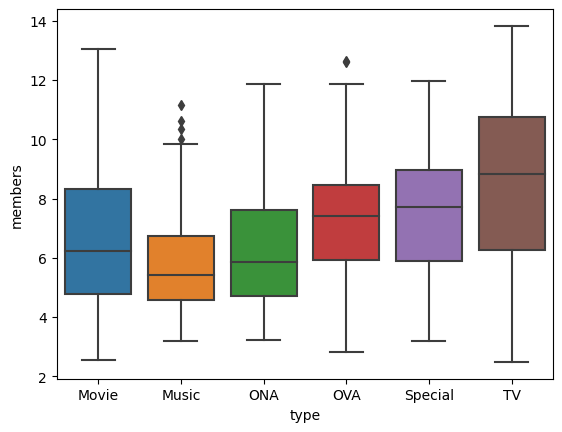

In [25]:
sns.boxplot(y = np.log(animedata['members']), x = 'type', data = animedata)

Analysis: Music and OVA show some outliers.

[Text(0.5, 1.0, 'Boxplots for all type of shows')]

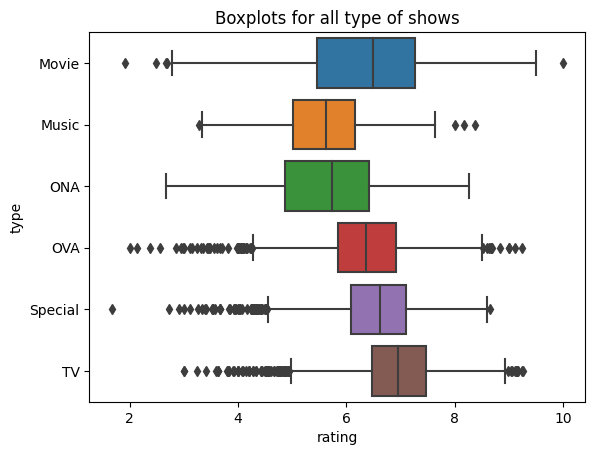

In [26]:
sns.boxplot(x="rating", y='type', data=animedata).set(title="Boxplots for all type of shows")

Analysis: Although TV shows are most made, but many of shows lie below the average rating of 7.

Text(0.5, 1.0, 'Types and size of dots representing no. of episodes')

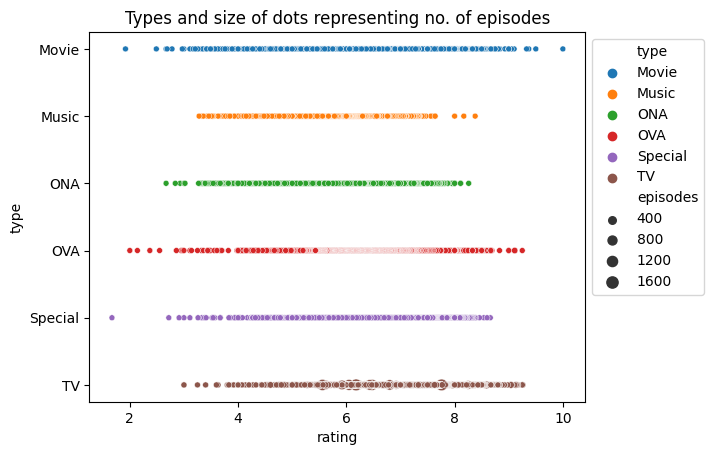

In [27]:
sns.scatterplot( x="rating", y='type', data=animedata, hue="type", size='episodes')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title("Types and size of dots representing no. of episodes")

<AxesSubplot: xlabel='genres', ylabel='count'>

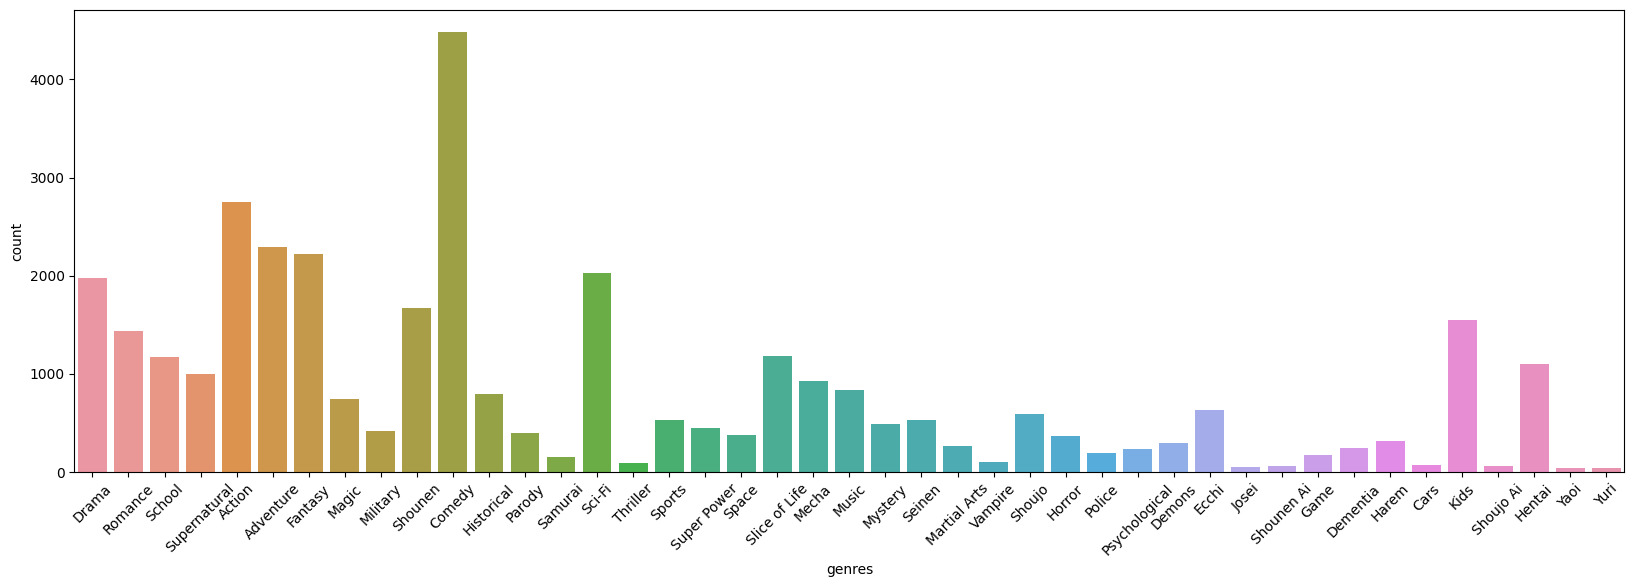

In [28]:
all_genres = []
for anime in animedata['genre']:
    anime = anime.strip()
    all_genres.extend(anime.split(', '))
c = Counter(all_genres)
c = pd.DataFrame.from_dict(c, orient='index').reset_index()
c = c.rename(columns={'index':'genres', 0:'count'})
fig, ax = plt.subplots(1, 1, figsize = (20, 6))
plt.xticks(rotation = 45)
sns.barplot(x='genres', y='count', data=c)

Analysis: Comedy is the most watched genre

[Text(0.5, 1.0, 'Type and Epsiodes')]

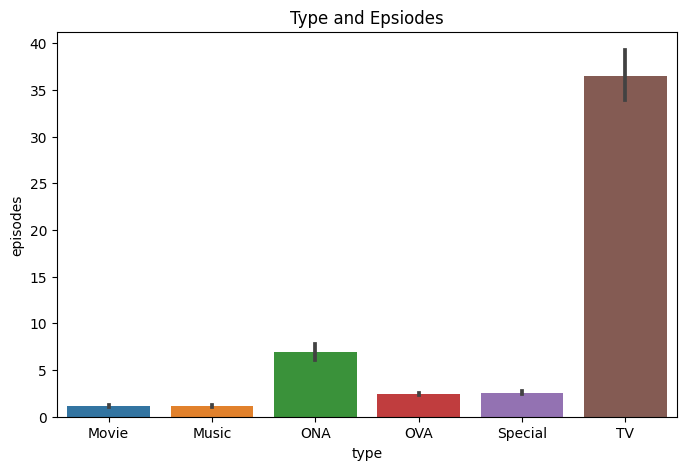

In [29]:
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
sns.barplot(data=animedata, x='type', y='episodes').set(title="Type and Epsiodes")

Analysis: On an average, TV shows feature 35 episodes

[Text(0.5, 1.0, 'Type and Rating')]

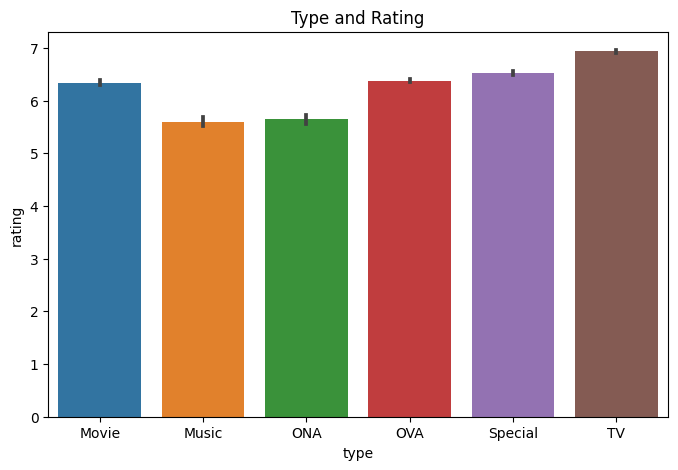

In [30]:
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
sns.barplot(data=animedata, x='type', y='rating').set(title="Type and Rating")

Analysis: All types gather around above average rating

In [31]:
# def standardize(x):
#     return (x-x.mean())/x.std()
# animedata['stdmember'] = standardize(animedata.members)
# animedata['normmember'] = (animedata.members-animedata.members.min())/(animedata.members.max()-animedata.members.min())
# animedata['stdepisodes'] = standardize(animedata.episodes)
# animedata['normepisodes'] = (animedata.episodes-animedata.episodes.min())/(animedata.episodes.max()-animedata.episodes.min())
# animedata['stdrating'] = standardize(animedata.rating)
# animedata['normrating'] = (animedata.rating-animedata.rating.min())/(animedata.rating.max()-animedata.rating.min())

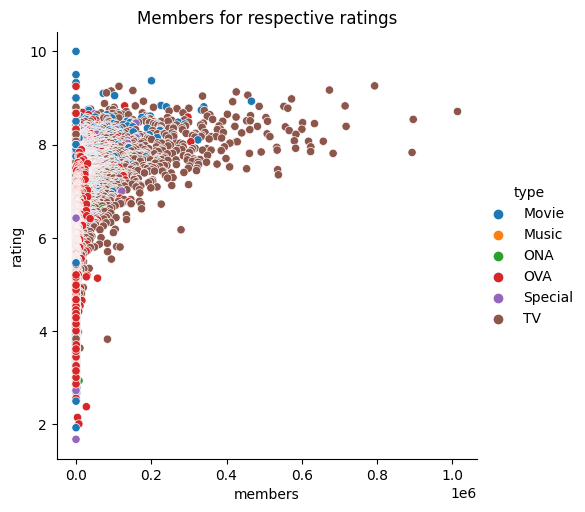

In [32]:
sns.relplot(x='members', y='rating', hue='type', data=animedata).set(title="Members for respective ratings")

## Relationship between two variables

Correlation : It gives us the strength of relationship between two variables but not causality

<AxesSubplot: >

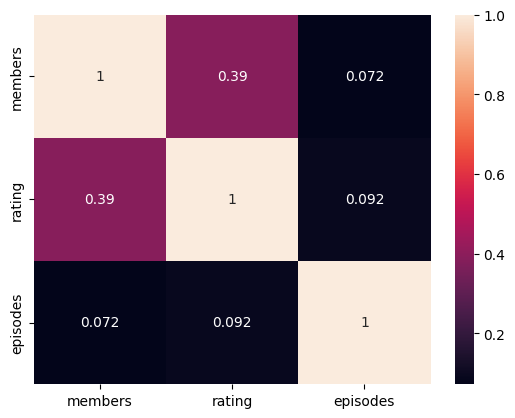

In [33]:
corrmatrix1 = animedata[['members', 'rating' , 'episodes']].corr()
sns.heatmap(corrmatrix1, annot= True)

Analysis: Ratings and members shows a weak positive correlation

### Advanced Analysis which I learned from internet

In [34]:
f = Counter(all_genres)
mapping = pd.DataFrame(np.zeros((len(f.keys()), len(animedata.type.unique())), dtype = int), index = list(f.keys()), columns=animedata.type.unique())

In [35]:
for genres in f.keys():
    for row in animedata.itertuples():
        if genres in row[2]:
            mapping.loc[genres, row[3]] += 1

<AxesSubplot: >

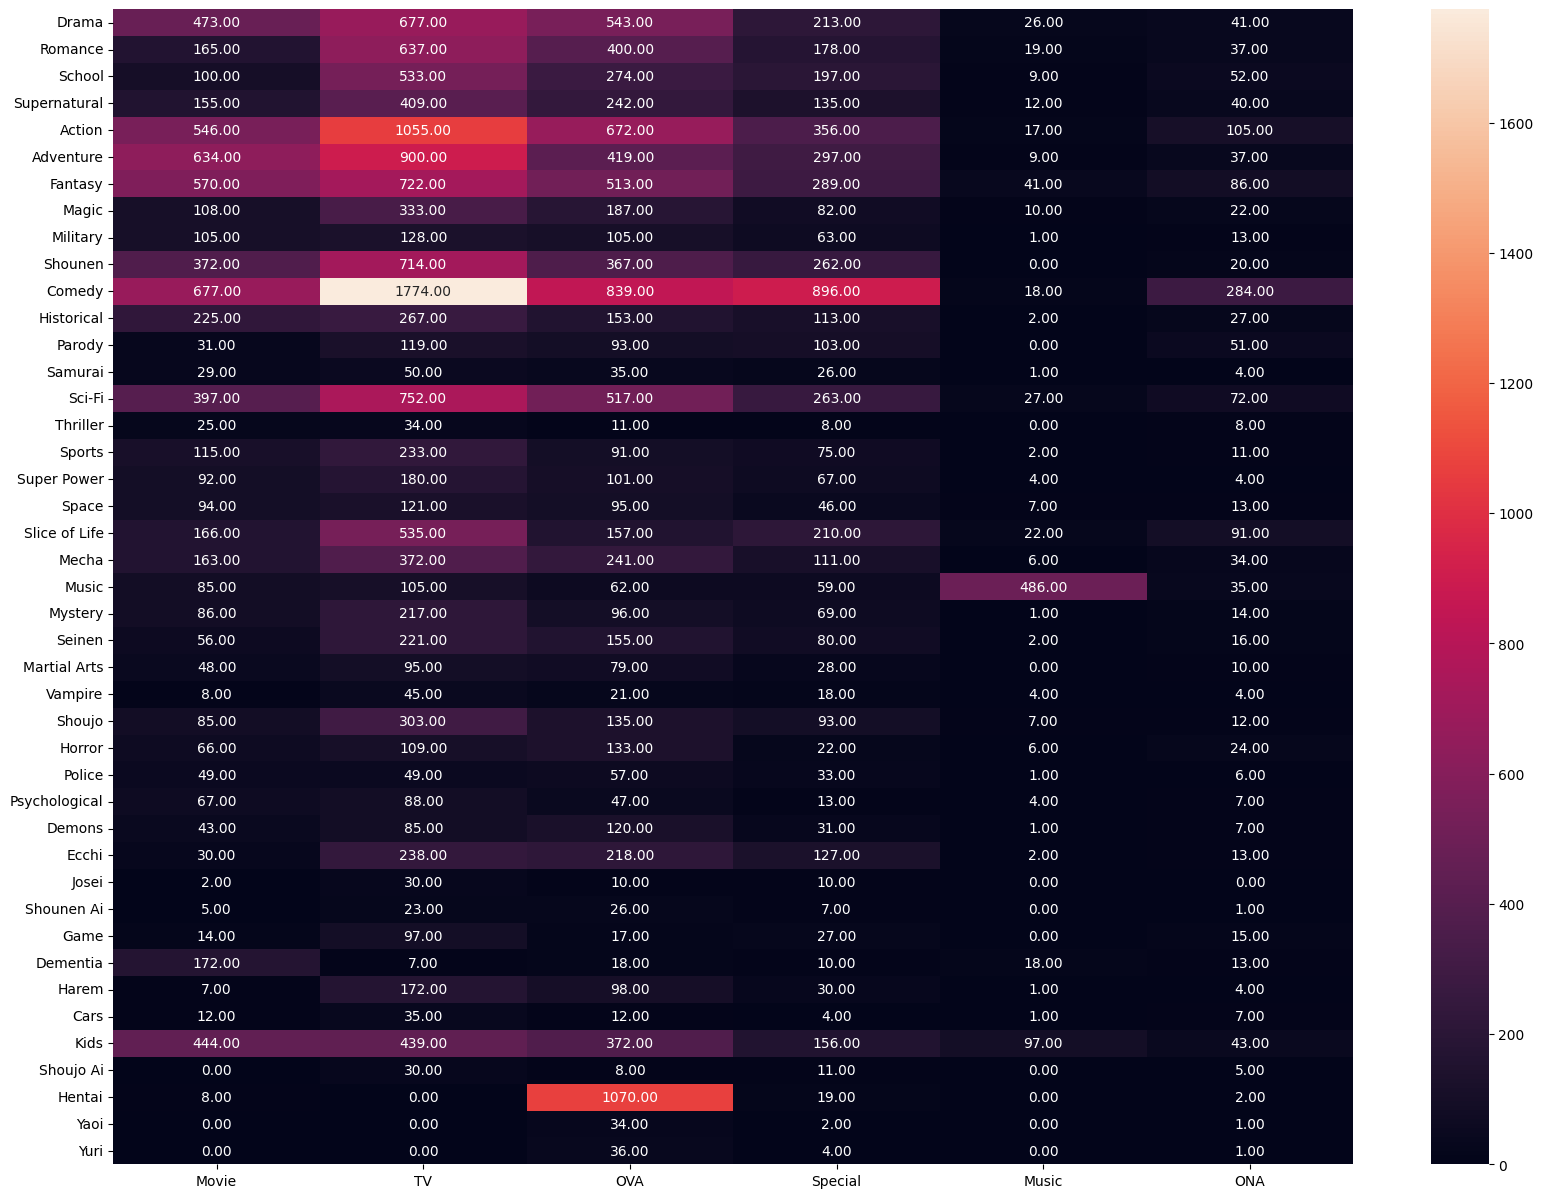

In [36]:
fig, ax = plt.subplots(1, 1, figsize = (20, 15))
sns.heatmap(mapping, annot = True, fmt=".2f")

In [37]:
rating_mapping = pd.DataFrame(np.zeros((len(f.keys()), len(animedata.type.unique())), dtype = float), index = list(f.keys()), columns=animedata.type.unique())

In [38]:
for item in f.keys():
    for row in animedata.itertuples():
        if item in row[2]:
            rating_mapping.loc[item, row[3]] += row[5]

In [39]:
rating_mapping = rating_mapping / mapping

<AxesSubplot: >

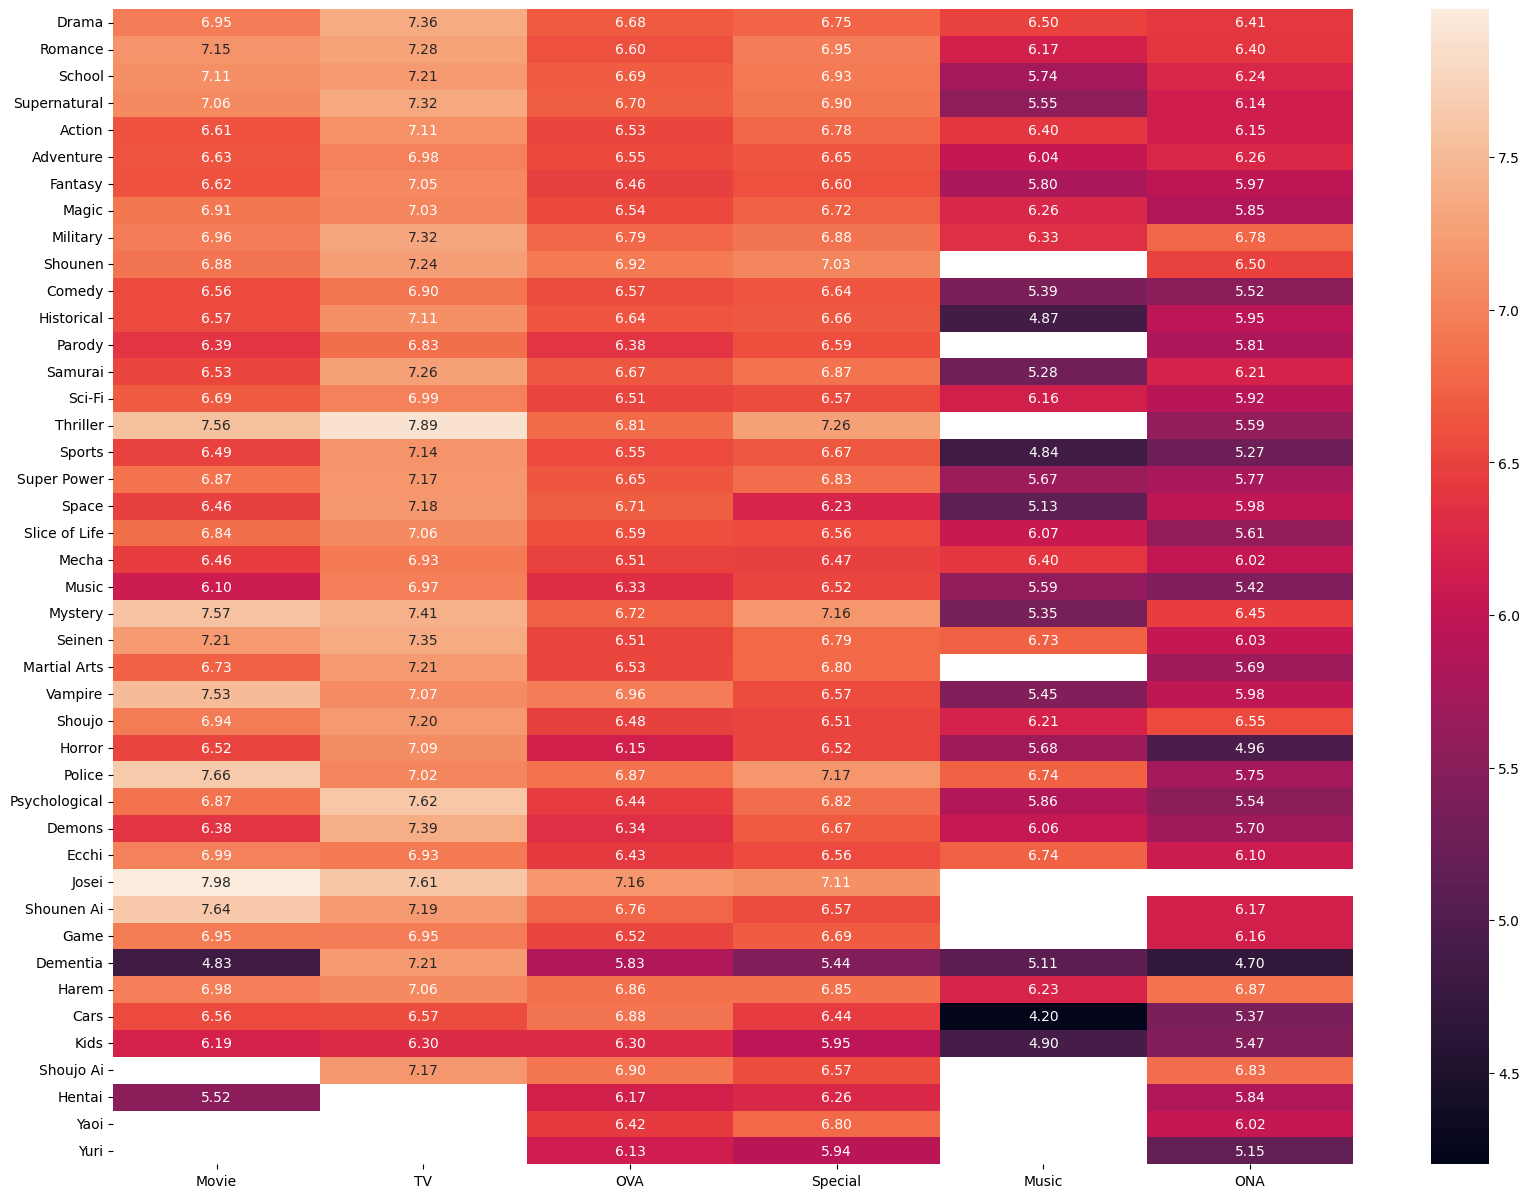

In [40]:
fig, ax = plt.subplots(1, 1, figsize = (20, 15))
sns.heatmap(rating_mapping, annot = True, fmt=".2f")

In [41]:
fmapping = pd.DataFrame(np.zeros((len(f.keys()), len(f.keys())), dtype = int), index = list(f.keys()), columns=f.keys())

In [42]:
i=0
for genres in f.keys():
    for row in animedata.itertuples():
        if genres in row[2]:
            indices = [i for i, x in enumerate(fmapping.columns) if x in row[2].split(", ")]
            fmapping.iloc[i, indices ] += 1
    i=i+1

In [50]:
for row in animedata.itertuples():
    print(row)
    print(type(row[2]))
    print(row[2].split(", "))
    break

Pandas(Index=0, name='Kimi no Na wa.', genre='Drama, Romance, School, Supernatural', type='Movie', episodes=1, rating=9.37, members=200630)
<class 'str'>
['Drama', 'Romance', 'School', 'Supernatural']


In [44]:
fmapping

,Drama,Romance,School,Supernatural,Action,Adventure,Fantasy,Magic,Military,Shounen,...,Shounen Ai,Game,Dementia,Harem,Cars,Kids,Shoujo Ai,Hentai,Yaoi,Yuri
Drama,1973,537,188,200,458,390,308,112,168,230,...,30,11,15,50,11,203,17,27,22,1
Romance,537,1436,386,192,237,216,270,159,62,180,...,39,7,6,211,1,22,23,42,20,3
School,188,386,1165,123,187,40,110,86,22,225,...,10,18,2,129,1,51,30,49,1,6
Supernatural,200,192,123,993,375,197,301,128,24,230,...,9,9,10,47,1,35,4,55,2,0
Action,458,237,187,375,2751,867,663,227,255,766,...,7,72,10,67,29,120,12,40,4,3
Adventure,390,216,40,197,867,2296,921,225,86,692,...,5,56,5,16,12,416,1,15,0,0
Fantasy,308,270,110,301,663,921,2221,414,40,395,...,11,56,13,60,1,513,6,65,0,3
Magic,112,159,86,128,227,225,414,742,15,119,...,2,11,0,37,0,70,4,21,0,0
Military,168,62,22,24,255,86,40,15,415,49,...,0,0,3,2,0,4,3,3,1,1
Shounen,260,219,235,239,773,697,406,121,49,1673,...,62,57,2,50,18,97,3,0,0,0
